# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['1011000110', '0010010001', '1101001010', '1111011000', '1110000111', '1000111100', '1000011010', '0000000010']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['0000000010', '0010010001', '0000000010', '1000111100', '0010010001', '1111011000', '1110000111', '1101001010']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['10000', '01111', '10000', '01111', '11000', '00111', '10000', '01111']

Mutation:
 ['11111', '01000', '11111', '01000', '11111', '00010', '11110', '00000']


A new generation:
 ['10000', '00111', '11001', '00101', '10000', '01110', '11001', '00111']


## 2: Demo GA - Sine [0, 128]

In [25]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log_2 = algorithm_2.run()

Algorithm succsessfully executed


In [26]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_2.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')
        

Generation: 0 

Population: ['010011011100011', '010011000110000', '110101000001001', '010111010010011', '011100101100001', '111101110101010', '110011011111110', '001001001101101', '010011001101001', '101111010101101', '101000111100000', '001011100011011', '010011100000000', '011000100011001', '100011000011001', '110000010111101', '111101001000000', '001001000011100', '111100000101110', '001110110011101'] 

Population real value: [ 38.88671875  38.1875     106.03515625  46.57421875  57.37890625
 123.6640625  102.9921875   18.42578125  38.41015625  94.67578125
  81.875       23.10546875  39.          49.09765625  70.09765625
  96.73828125 122.25        18.109375   120.1796875   29.61328125] 

Population sine fitness value: ['0.93', '0.47', '-0.70', '0.52', '0.74', '-0.91', '0.63', '-0.41', '0.65', '0.42', '0.19', '-0.90', '0.96', '-0.92', '0.83', '0.61', '0.27', '-0.67', '0.72', '-0.97'] 


Generation: 10 

Population: ['111011001001110', '101011100001110', '001000001010000', '100111100

<IPython.core.display.Javascript object>


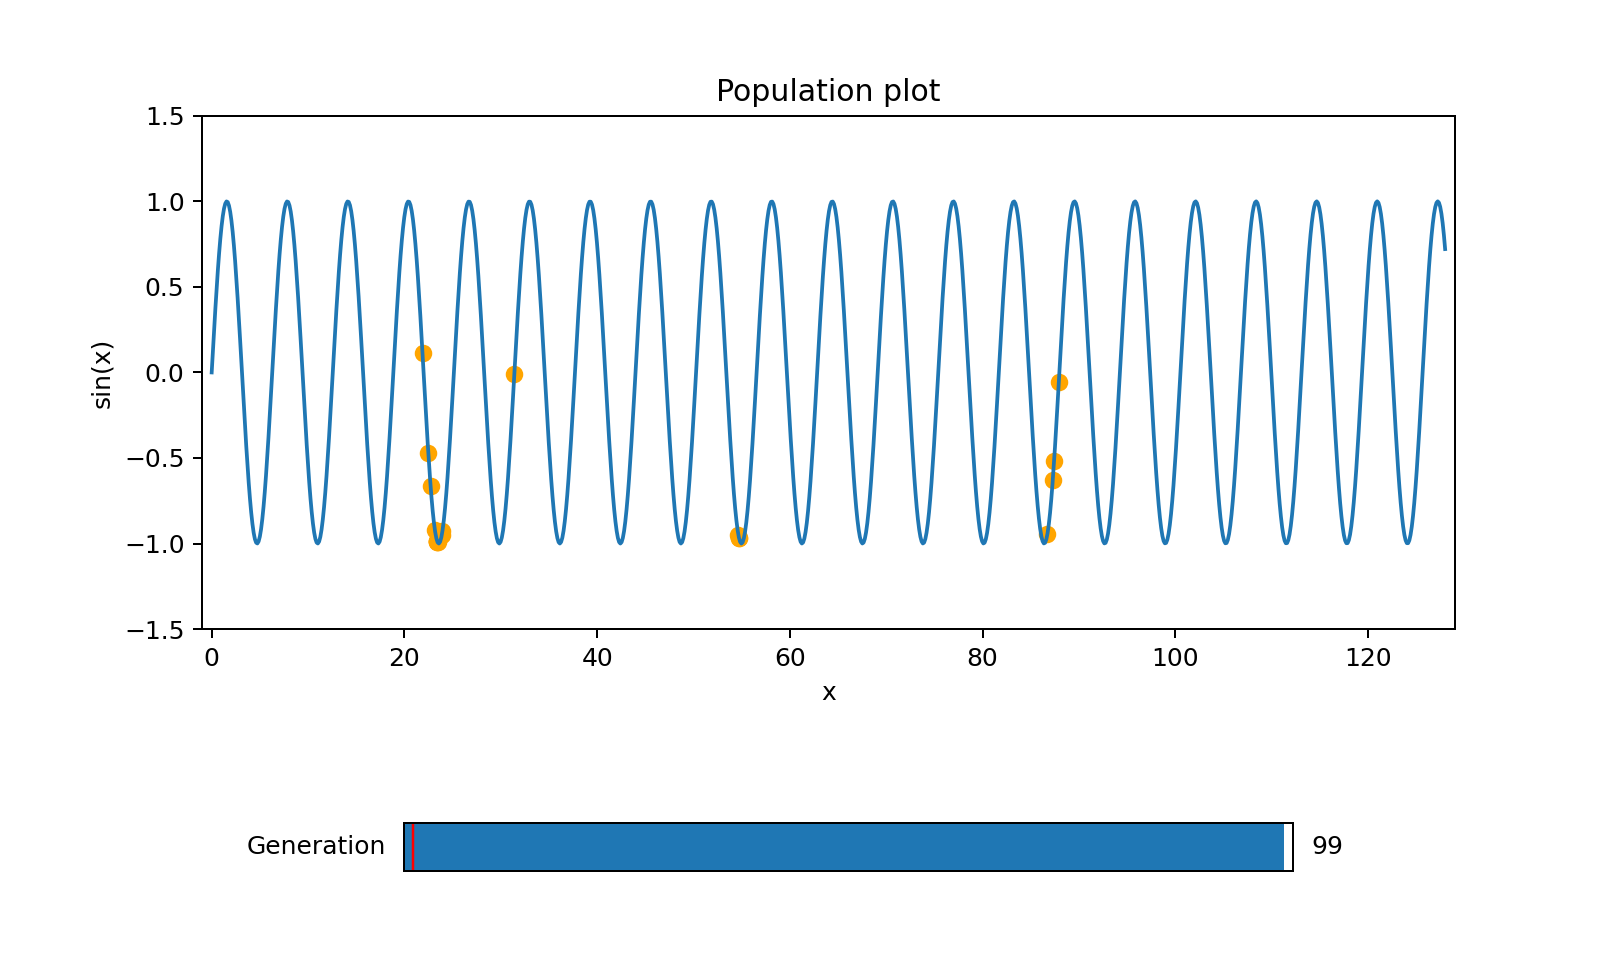

0

In [33]:
# Plot the population through the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = eval_log[i][0]
y = eval_log[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[eval_log[gen][0], eval_log[gen][1]])

generation.on_changed(update)


    


<IPython.core.display.Javascript object>


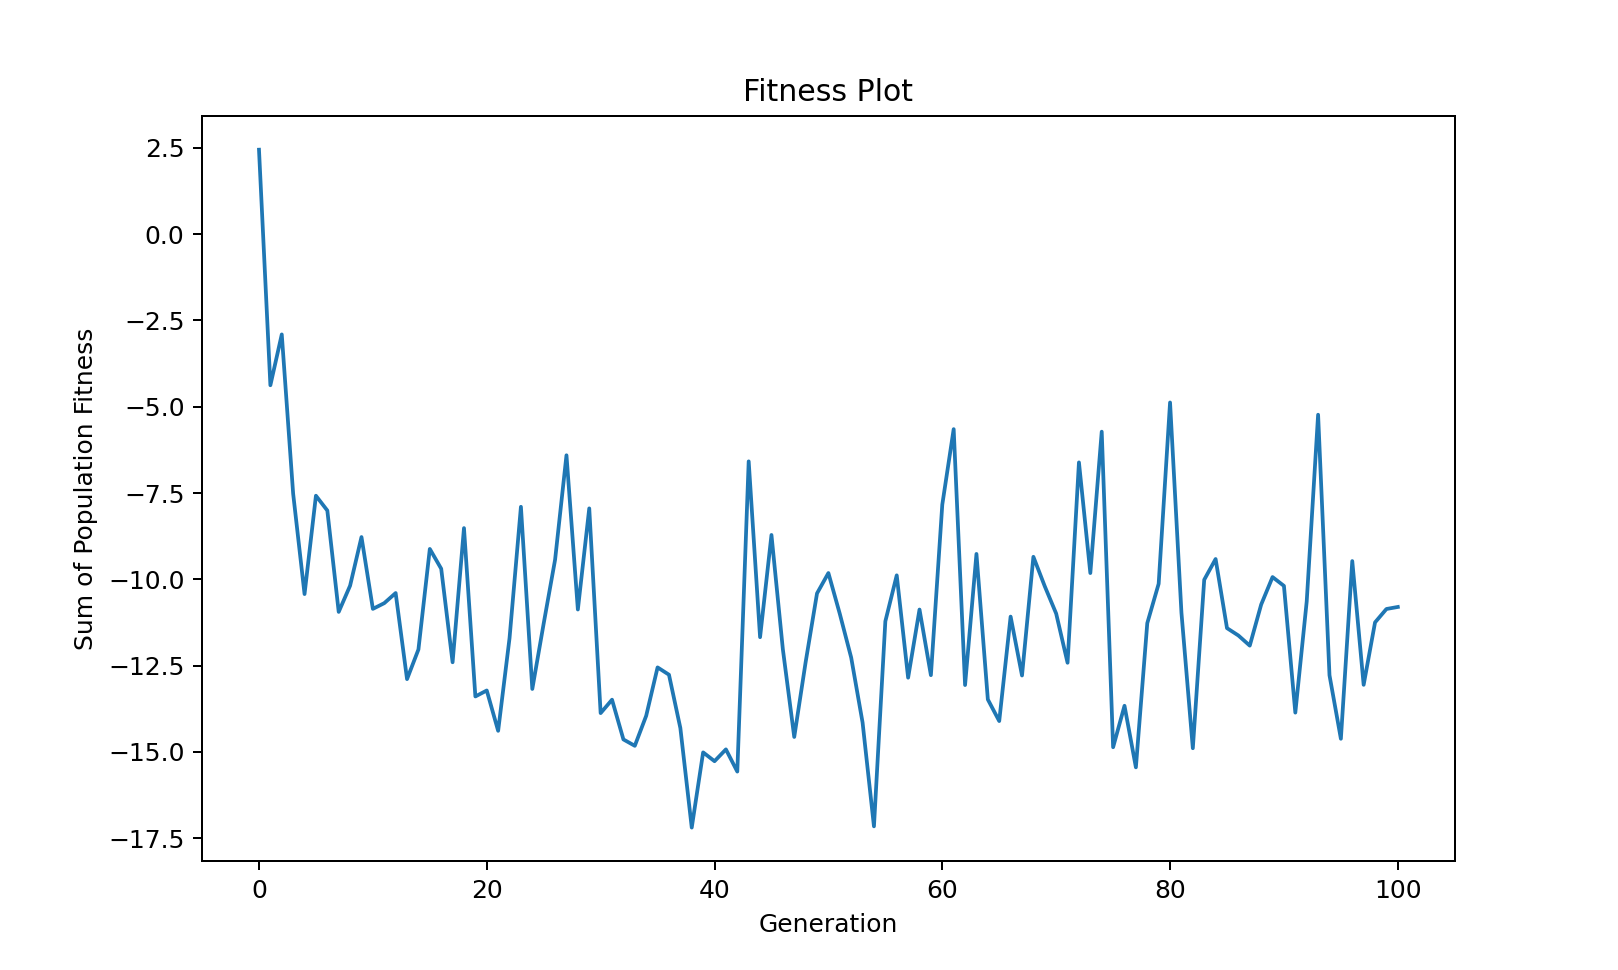

In [35]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_2[i][1]) for i in eval_log_2.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [9]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [10]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population real value:', data[0], '\n')
        print('Population sine fitness values:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')

Generation: 0 

Population: ['111111001100011', '001110001011001', '000111001001110', '111010100101011', '011000100111111', '111011100010100', '001011100000001', '111110010011111', '100100101000001', '000111111100100', '000010011100100', '001011010001000', '000010111001011', '011011010011100', '010001000001011', '001101111100111', '110101110100011', '001101100011101', '100001000100010', '100110011000000'] 

Population real value: [126.38671875  28.34765625  14.3046875  117.16796875  49.24609375
 119.078125    23.00390625 124.62109375  73.25390625  15.890625
   4.890625    22.53125      5.79296875  54.609375    34.04296875
  27.90234375 107.63671875  27.11328125  66.1328125   76.75      ] 

Population sine fitness value: ['-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-0.47', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25'] 


Generation: 10 

Population: ['011101011111101', '110101100011101', '110101110111000',

<IPython.core.display.Javascript object>


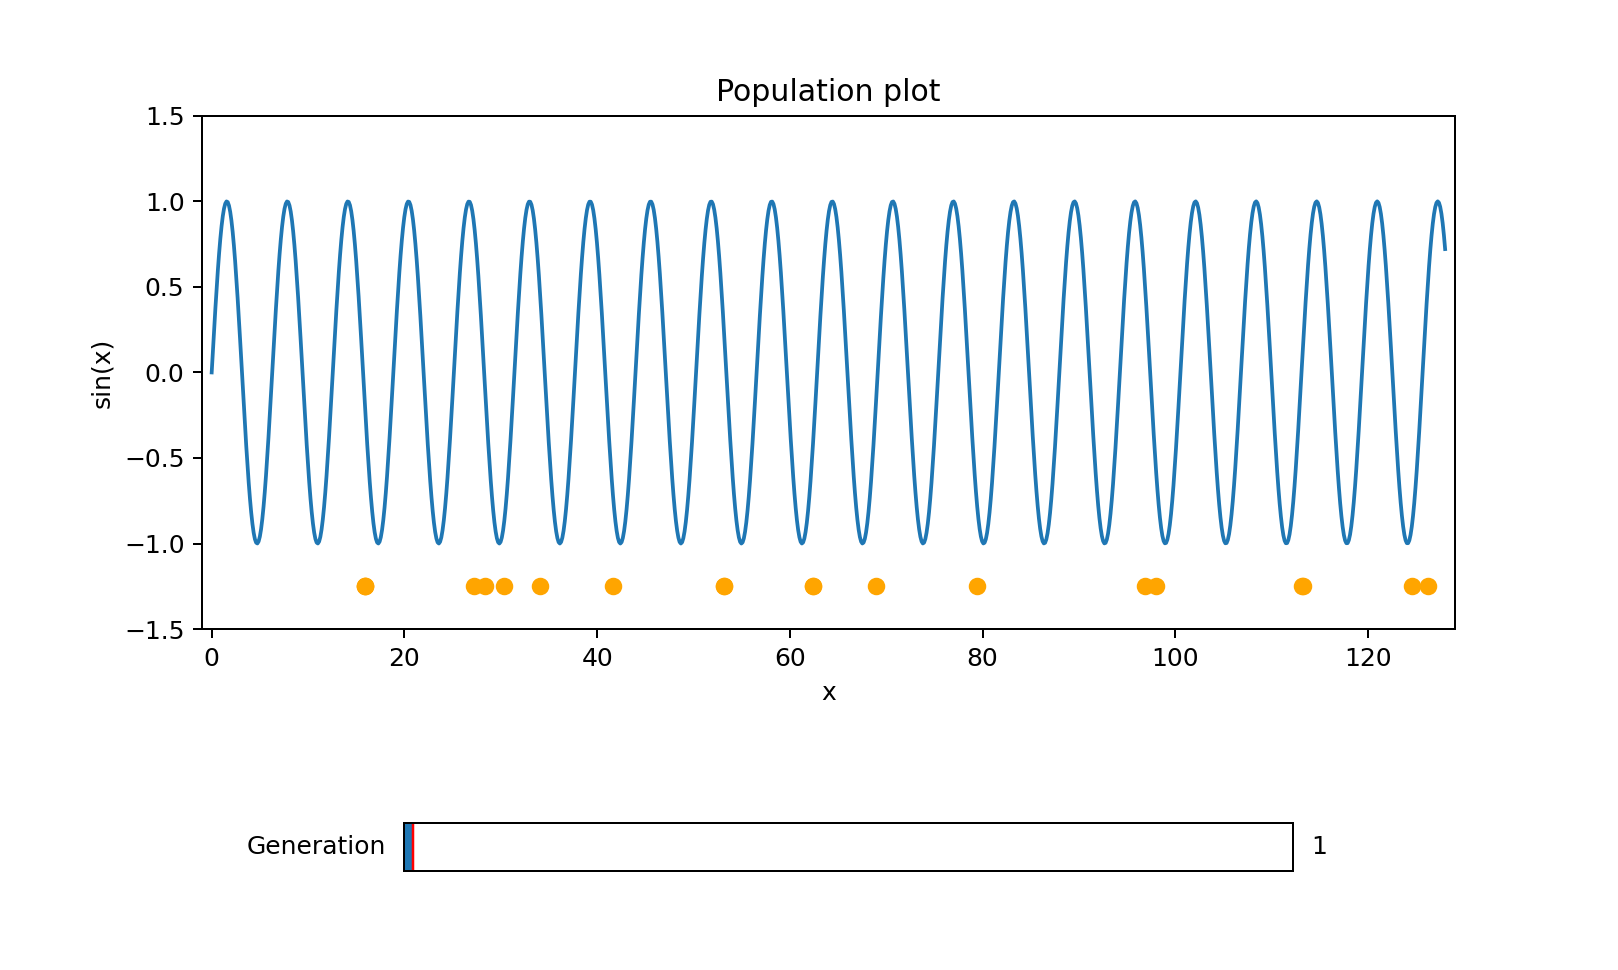

0

In [11]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][0]
y = DATA[i][1]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][0], DATA[gen][1]])

generation.on_changed(update)


<IPython.core.display.Javascript object>


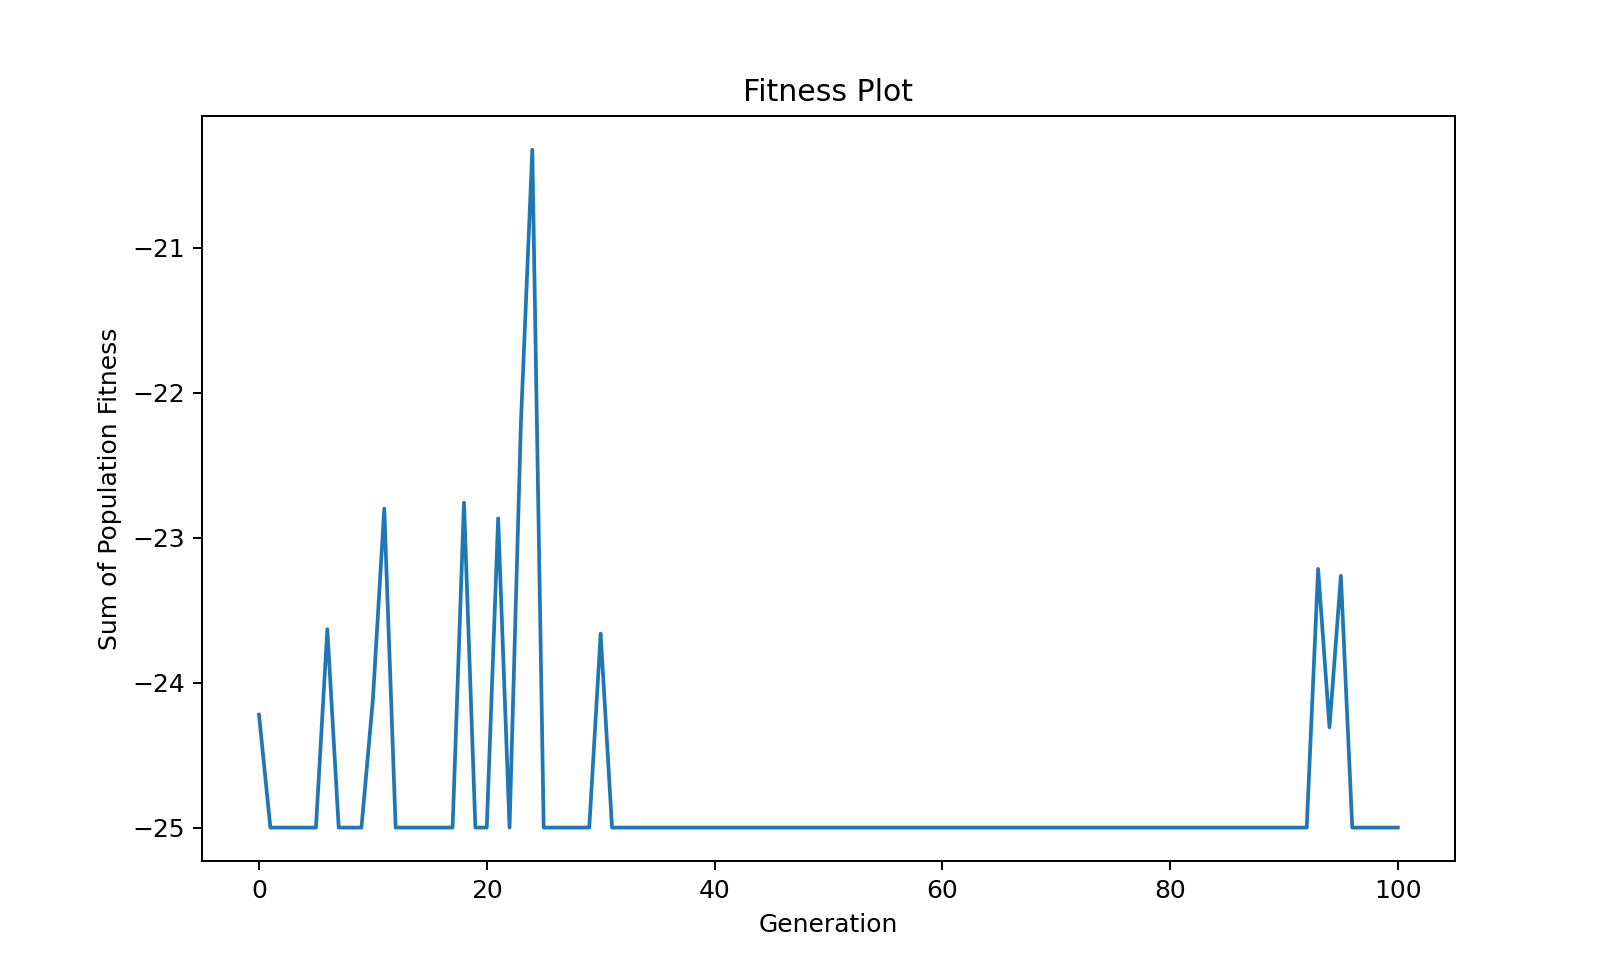

In [36]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_3[i][1]) for i in eval_log_3.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 4: Demo GA - Feature selection

In [12]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,28.0,10.0,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,12.0,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6.0,10.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9.0,10.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,6.0,10.0,0.2,0.78,0.14,0.46,0.24,0.77,0.5,0.62,...,0.68,0.5,0.34,0.35,0.68,0.11,0.3,0.05,1.0,0.48


In [47]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 10,              # Has to be even
        'num_parents':10,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 100, 
        'sine_constraint': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)

In [48]:
# Test regression class
import LinReg

test_pop = algorithm_4.init_pop()
#print(test_pop)

linreg = LinReg.LinReg()
#feats = values_df.to_numpy().shape[1]
#x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
#y = values_df.to_numpy().reshape(feats, 1)
#linreg.train(x, y)
errors = []
for indiv in test_pop:
    x = linreg.get_columns(data_df, indiv)
    y = linreg.get_columns(values_df, indiv)
    #print(x.shape, y.shape)
    feats = y.shape[1]
    x = x.reshape(feats, x.shape[0])
    y = y.reshape(feats, 1)
    error = linreg.get_fitness(x, y)
    errors.append(error)
    #print(error)
    

In [49]:
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [50]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        print('Generation:', generation, '\n')
        print('Population:', data[2], '\n')
        print('Population RMSE:', data[0], '\n')
        print('Population fitness values:', ['{:.2f}'.format(item) for item in data[1]], '\n\n')

Generation: 0 

Population: ['100110011110000100110010111000100001110111010011000111001010001100010010100101010100101111001001110010', '011011001000000111011111100111110010010010001000110101010010010011011000000000100010100010111100110010', '011011001010111110011011000011111111110011010011110001000000101111101011011001111010110100101001010110', '100101011111111011011010110101100101001001010000101110110001000011010100110001101101101000101001011000', '000001100000001101000100111001111110011001100110011101000110100000101101011011101110110001001100010010', '000000010010010110000000010111000001110010010100111000101011001010011100001100100010100001101011010011', '111110100001101010001011000111111101101000011011100111110000001110000001111001011111001111000000101011', '101000001010111101101100011110001111110101000101100111110011110111110010001101101101011010011100111001', '110010011101011100100111111011111100111101011111101110010001100101110011100110000011111001011101000001', '0101110001001110

<IPython.core.display.Javascript object>


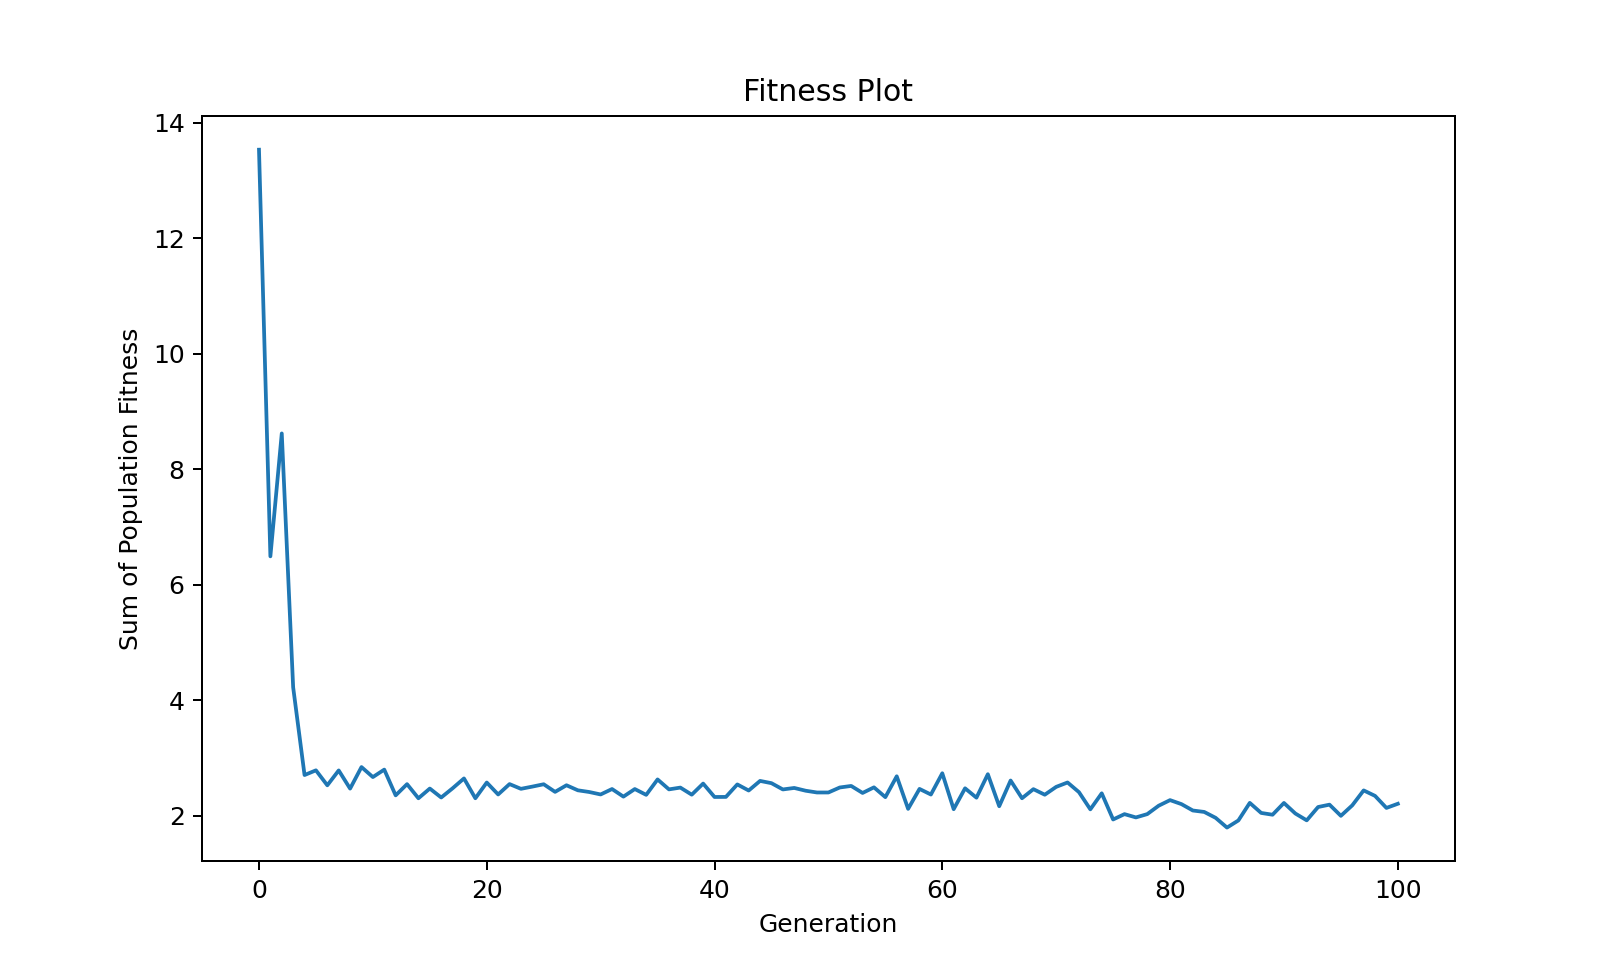

In [51]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_4[i][0]) for i in eval_log_4.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)



In [52]:
# Print key measures
print('Per generation: min, mean, medidan:')
min_list = [min(eval_log_4[i][0]) for i in list(eval_log_4.keys())[10:]]
mean_list = [np.mean(eval_log_4[i][0]) for i in list(eval_log_4.keys())[10:]]
median_list = [np.median(eval_log_4[i][0]) for i in list(eval_log_4.keys())[10:]]

print(np.mean(min_list), np.mean(mean_list), np.mean(median_list))

Per generation: min, mean, medidan:
0.17982773724008752 0.23494663588811468 0.23578708171140778
